<a href="https://colab.research.google.com/github/Nabizeus/Google_ML/blob/main/Deeplearn_NN_Regression_Boston_Houseprice_1970.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# From the book Deep Learning with Python by Francois Chollet
# 2018 by Manning Publications Co. All rights reserved.
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

**Normalizing the data**

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /=  std

In [11]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential() #Because you’ll need to instantiate
  #the same model multiple times, you
  #use a function to construct it.
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

**Kreuzvalidierung**

In [12]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [14]:
for i in range(k):
  print('processing fold #', i)
  # Prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepares the training data: data from all other partitions
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model() #Builds the Keras model (already compiled)
  #Trains the model(in silent mode, verbose = 0)
  model.fit(partial_train_data, partial_train_targets, 
  epochs=num_epochs, batch_size=1, verbose=0)
  # Evaluates the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
all_scores, np.mean(all_scores)

([2.180016279220581,
  2.5612027645111084,
  2.5406739711761475,
  2.585331678390503],
 2.466806173324585)

**Saving the validation logs at each fold**

In [29]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  # Prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepares the training data: data from all other partitions

  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  # Builds the Keras model (already compiled)
  model = build_model()
  # Trains the model (in silent mode, verbose=0)
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [28]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


**History of successive mean K-fold validation scores**

In [30]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

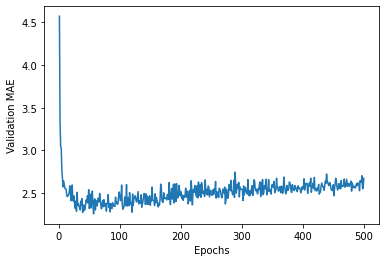

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


**Plotting validation exclude 10 first points**

In [108]:
def smooth_curve(points, factor=0.9):
  smoothed_points = [points[0]]
  #print('points',points)
  for point in points:
    #print('point',point)
    #print('factor',factor)
    #if smoothed_points:
      
    previous = smoothed_points[-1]
    #print('previous',previous)
    smoothed_points.append(previous * factor + point * (1 - factor))
    #print('smoothed_points',smoothed_points)
   # else:
    smoothed_points.append(point)
    return smoothed_points

In [90]:
points= []
for point in points:
  print(points[-1])

0


In [43]:
average_mae_history[0:10]


[4.570172190666199,
 3.3481761813163757,
 3.0441320538520813,
 3.0272292494773865,
 2.769124448299408,
 2.6624411940574646,
 2.5709380507469177,
 2.6421908140182495,
 2.596246898174286,
 2.554062783718109]

[4.570172190666199, 4.570172190666199, 4.570172190666199]


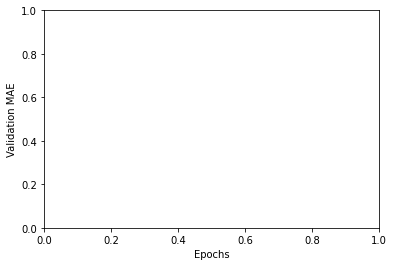

In [109]:
smooth_mae_history = smooth_curve(average_mae_history)
print(smooth_mae_history)

#plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Train the final model**

In [33]:
model = build_model() # Gets a fresh, compiled model
model.fit(train_data, train_targets, #Trains it on the entirety of the data
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 15.5711 - mae: 2.6508


In [35]:
test_mae_score

2.650789260864258

Wrapping up
Here’s what you should take away from this example:
* Regression is done using different loss functions than what we used for classification.
Mean squared error (MSE) is a loss function commonly used for regression.
*  Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally, the concept of accuracy doesn’t apply for regression. A
common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.
*  When there is little data available, using K-fold validation is a great way to reliably
evaluate a model.
*  When little training data is available, it’s preferable to use a small network with
few hidden layers (typically only one or two), in order to avoid severe